In [37]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_mean = pd.read_pickle(file_path)
#df_mean.drop(columns="Price", inplace=True)
#df_mean.rename(columns={"CO2E_EMISSIONS_FACTOR":"t CO2-e / MWh"}, inplace=True)
df_mean.head()

,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [39]:
#cols = df_mean.columns.tolist()
#cols = cols[:-1] + cols[-1:]
#df_mean = df_mean[cols]
#df_mean.rename(columns={"CO2E_EMISSIONS_FACTOR":"t CO2-e / MWh"}, inplace=True)
#df_mean.head()

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


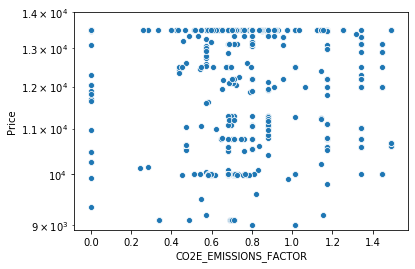

<Figure size 432x288 with 0 Axes>

In [40]:
fig = sns.scatterplot(df_mean.CO2E_EMISSIONS_FACTOR, df_mean.Price)
fig.set_yscale("log")
fig.set_ylim(0,14000)
plt.figure();

### __Seasonal behaviour of marginal CO2 among different time resolutions__

In [41]:
group_year = df_mean.groupby(df_mean.index.year).mean()
group_quarter = df_mean.groupby(df_mean.index.quarter).mean()
group_month = df_mean.groupby(df_mean.index.month).mean()
group_week = df_mean.groupby(df_mean.index.week).mean()
group_weekday = df_mean.groupby(df_mean.index.weekday).mean()
group_day = df_mean.groupby(df_mean.index.day).mean()
group_hour = df_mean.groupby(df_mean.index.hour).mean()
group_minute = df_mean.groupby(df_mean.index.minute).mean()

#quarter: Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.

In [42]:
time_periods = {"year":group_year,"quarter":group_quarter, "month":group_month, "week":group_week,\
                "weekday":group_weekday,"day":group_day, "hour":group_hour, "minute":group_minute}

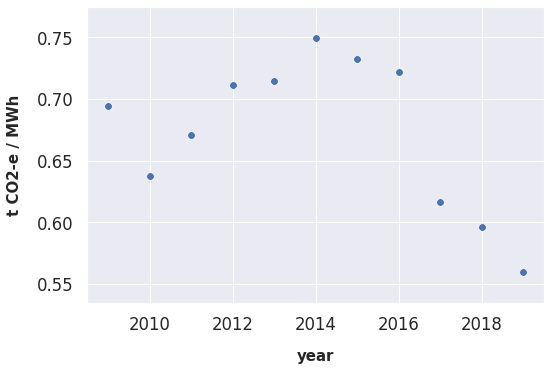

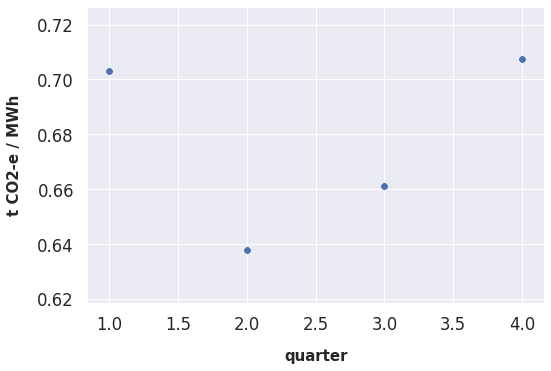

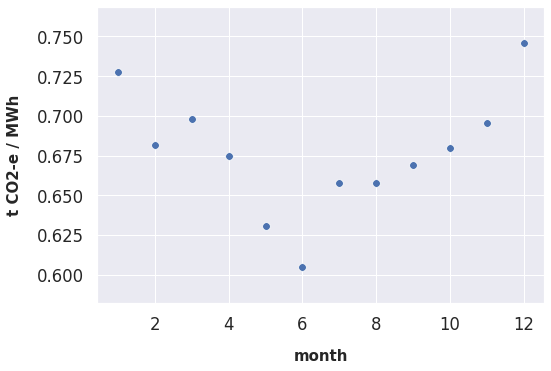

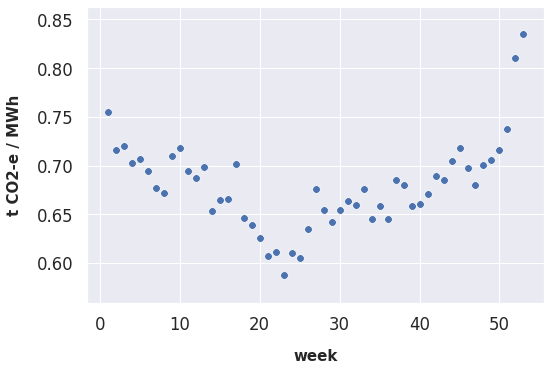

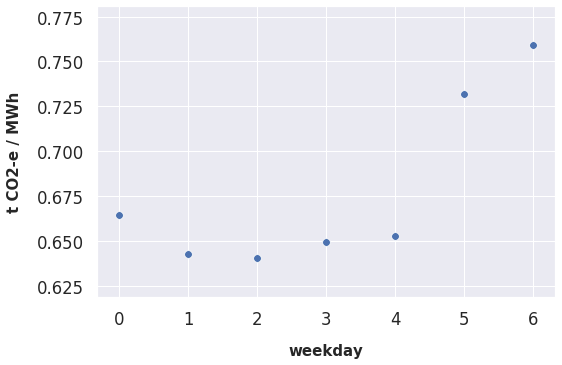

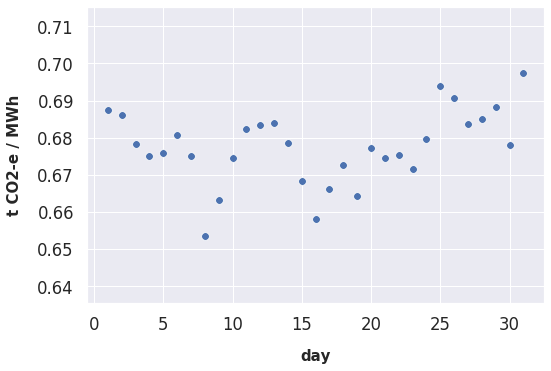

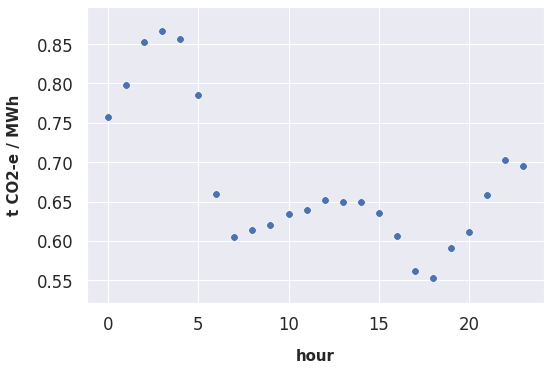

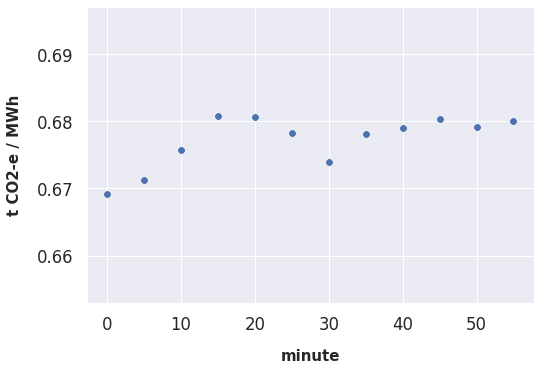

<Figure size 576x396 with 0 Axes>

In [64]:
for i in time_periods:
    fig = sns.scatterplot(time_periods[i].index, time_periods[i].CO2E_EMISSIONS_FACTOR, s=60)
    
    fig.set_xlabel(i, labelpad=15, fontsize=15, fontweight='bold')
    fig.set_ylabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')
    
    plt.style.use('seaborn')
    sns.set(font_scale=1.5)
    plt.tight_layout()
    
    file_path = '{}/Desktop/Portfolio_project/presentation/{}.png'.format(os.environ['HOME'],i)
    plt.savefig(file_path)
    
    plt.figure()

In [49]:
#for i in time_periods:
#    fig = sns.scatterplot(time_periods[i].index, time_periods[i].CO2E_EMISSIONS_FACTOR)
#    fig.set(xlabel = i, ylabel = "CO2")
#    
#    file_path = '{}/Desktop/Portfolio_project/presentation/{}.png'.format(os.environ['HOME'],i)
#    plt.savefig(file_path)
#    
#    plt.figure()

In [47]:
group_year_month = df_mean.groupby([df_mean.index.year, df_mean.index.month]).mean()
group_year_month

Price  CO2E_EMISSIONS_FACTOR
2009 7    27.446231               0.712181
     8    22.771027               0.746957
     9    27.074297               0.714911
     10   27.976296               0.643430
     11  197.206615               0.638268
...             ...                    ...
2019 4    93.843876               0.542918
     5    84.855051               0.510462
     6    95.702142               0.501340
     7    73.927118               0.554505
     8    89.618058               0.535162

[122 rows x 2 columns]

In [50]:
#df_unstacked = group_year_month.unstack(level=0).CO2E_EMISSIONS_FACTOR
#
#fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15,7))
#plt.tight_layout()
#
#count_k = 0
#for i in range(axes.shape[0]):
#    for j in axes[i]:
#        j.set_xlim(1,12)
#        j.set_ylim(0.45,0.95)
#        j.set_xticks(list(range(2,13,2)))
#        for i in time_periods:
#            j.plot(time_periods[i].index, time_periods[i].CO2E_EMISSIONS_FACTOR)
#        count_k += 1

In [51]:
#df_unstacked = group_year_month.unstack(level=0).CO2E_EMISSIONS_FACTOR
#
#fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15,7))
#plt.tight_layout()
#
#count_k = 0
#for i in range(axes.shape[0]):
#    for j in axes[i]:
#        j.set_xlim(1,12)
#        j.set_ylim(0.45,0.95)
#        j.set_xticks(list(range(2,13,2)))
#        j.set_title(df_unstacked.columns[count_k])
#        j.plot(df_unstacked.index, df_unstacked.iloc[:, count_k])
#        count_k += 1

In [15]:
df_unstacked = group_year_month.unstack(level=0).CO2E_EMISSIONS_FACTOR

In [18]:
df_unstacked

PeriodID,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
PeriodID,,,,,,,,,,
1,NaN,0.699457,0.655480,0.783358,0.762508,0.874584,0.807080,0.779090,0.724257,0.596632
2,NaN,0.625458,0.610721,0.776635,0.687033,0.808551,0.727536,0.741494,0.641374,0.597925
3,NaN,0.645102,0.616553,0.756958,0.717267,0.852429,0.748992,0.729118,0.701825,0.642916
4,NaN,0.668365,0.647906,0.662153,0.713688,0.799783,0.706933,0.779545,0.632058,0.608576
5,NaN,0.583924,0.604423,0.715107,0.676363,0.723618,0.688686,0.709998,0.562308,0.549339
6,NaN,0.550888,0.674476,0.575157,0.638230,0.693586,0.645222,0.637817,0.533984,0.767256
7,0.712181,0.640871,0.668183,0.692139,0.727168,0.684359,0.733954,0.722642,0.511428,0.597887
8,0.746957,0.615287,0.661123,0.738354,0.717231,0.610381,0.705031,0.703295,0.571258,NaN
9,0.714859,0.623407,0.704685,0.710217,0.665992,0.592049,0.671736,0.729655,0.674198,NaN


In [23]:
df_unstacked.columns

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='PeriodID')

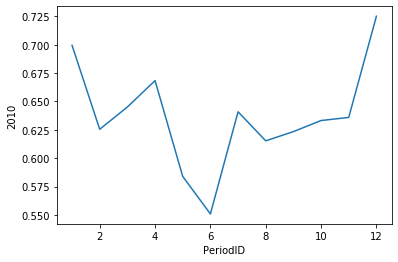

In [28]:
fig = sns.lineplot(df_unstacked.index, df_unstacked[2010])